## *Importing Modules* 

In [1]:
import pandas as pd
import numpy as np
from numpy.random import randint 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

## *Reading the file*

In [75]:
data = pd.read_csv("Clean_Dataset.csv", delimiter=',', encoding = "utf-8")

## *Data Description*

**The various features of the cleaned dataset are explained below:** 

 **1) Airline:** The name of the airline company is stored in the airline column. It is a categorical feature having 6 different  airlines.     
 **2) Flight:** Flight stores information regarding the plane's flight code. It is a categorical feature.    
 **3) Source City:** City from which the flight takes off. It is a categorical feature having 6 unique cities.     
 **4) Departure Time:** This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.      
 **5) Stops:** A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.      
 **6) Arrival Time:** This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.     
 **7) Destination City:** City where the flight will land. It is a categorical feature having 6 unique cities.     
 **8) Class:** A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.    
 **9) Duration:** A continuous feature that displays the overall amount of time it takes to travel between cities in hours.   
 **10)Days Left:** This is a derived characteristic that is calculated by subtracting the trip date by the booking date.   
 **11) Price:** Target variable stores information of the ticket price.    

## *Data Analysis*

In [76]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [78]:
data.describe(include = "object")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [79]:
data.describe(include = "float")

,duration
count,300153.000000
mean,12.221021
std,7.191997
min,0.830000
25%,6.830000
50%,11.250000
75%,16.170000
max,49.830000


<br>

## *Data preprocessing*

### *Checking for Nulls* 

In [80]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

*There is no missing values*

### *Checking for Duplicates* 

In [81]:
data.duplicated().sum()

0

### *Handling outliers* 

<AxesSubplot:xlabel='price', ylabel='Count'>

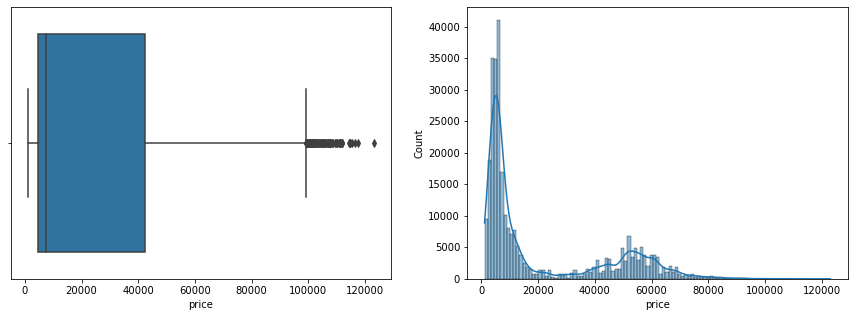

In [82]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = data)
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = data, kde = True)

<AxesSubplot:xlabel='duration'>

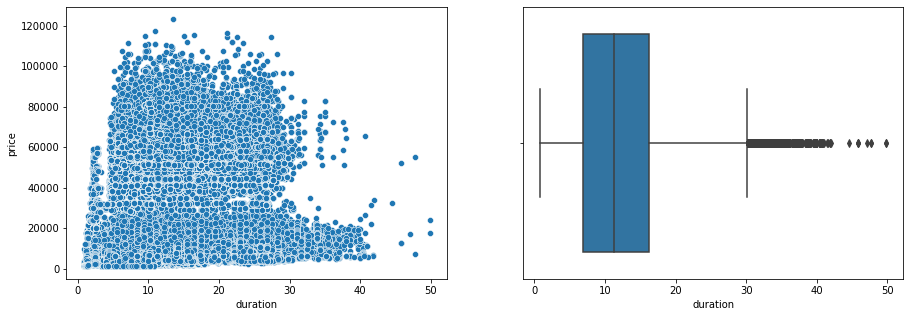

In [83]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=data,x='duration',y='price')
plt.subplot(1,2,2)
sns.boxplot(data=data,x='duration')


<AxesSubplot:xlabel='days_left'>

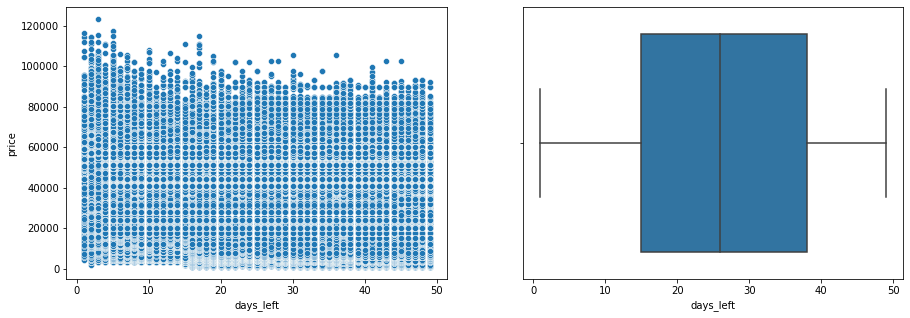

In [84]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=data,x='days_left',y='price')
plt.subplot(1,2,2)
sns.boxplot(data=data,x='days_left')


In [85]:
x=data[data['price']<100000]
x.shape

(300045, 12)

In [86]:
x=data[data['duration']>30]
x.shape

(2226, 12)

In [87]:
data=data[data['price']<100000]
data=data[data['duration']<30]

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297720 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        297720 non-null  int64  
 1   airline           297720 non-null  object 
 2   flight            297720 non-null  object 
 3   source_city       297720 non-null  object 
 4   departure_time    297720 non-null  object 
 5   stops             297720 non-null  object 
 6   arrival_time      297720 non-null  object 
 7   destination_city  297720 non-null  object 
 8   class             297720 non-null  object 
 9   duration          297720 non-null  float64
 10  days_left         297720 non-null  int64  
 11  price             297720 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 29.5+ MB


### *Data cleaning* 

In [89]:
# Drop Unnecessary Columns
data.drop('Unnamed: 0', axis=1, inplace=True)

### *Data Fitting & Splitting* 

In [90]:
type(data.dtypes.values)

numpy.ndarray

In [91]:
data.dtypes.values

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('int64'), dtype('int64')], dtype=object)

In [92]:
data.columns.values

array(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'], dtype=object)

In [93]:
encoded_classes = {}

In [94]:
for i in range(len(data.dtypes.values)):
    if(data.dtypes.values[i] == "O"):
        col = data.columns.values[i]
        label_encoder = LabelEncoder()
        data[col] = label_encoder.fit_transform(data[col])
        encoded_classes[col] = list(label_encoder.classes_)

In [95]:
encoded_classes

{'airline': ['AirAsia',
  'Air_India',
  'GO_FIRST',
  'Indigo',
  'SpiceJet',
  'Vistara'],
 'flight': ['6E-102',
  '6E-105',
  '6E-113',
  '6E-121',
  '6E-123',
  '6E-126',
  '6E-128',
  '6E-131',
  '6E-132',
  '6E-134',
  '6E-135',
  '6E-136',
  '6E-138',
  '6E-139',
  '6E-146',
  '6E-148',
  '6E-149',
  '6E-151',
  '6E-152',
  '6E-153',
  '6E-154',
  '6E-156',
  '6E-157',
  '6E-161',
  '6E-164',
  '6E-165',
  '6E-168',
  '6E-171',
  '6E-172',
  '6E-176',
  '6E-177',
  '6E-179',
  '6E-181',
  '6E-183',
  '6E-184',
  '6E-186',
  '6E-188',
  '6E-192',
  '6E-193',
  '6E-198',
  '6E-199',
  '6E-2001',
  '6E-2005',
  '6E-2007',
  '6E-2008',
  '6E-2009',
  '6E-201',
  '6E-2013',
  '6E-2015',
  '6E-2016',
  '6E-2022',
  '6E-2025',
  '6E-2026',
  '6E-2027',
  '6E-2028',
  '6E-2031',
  '6E-2032',
  '6E-2033',
  '6E-2034',
  '6E-2036',
  '6E-2042',
  '6E-2043',
  '6E-2046',
  '6E-2047',
  '6E-2048',
  '6E-205',
  '6E-2053',
  '6E-2054',
  '6E-2057',
  '6E-2061',
  '6E-2062',
  '6E-2065',
  '6

In [96]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [98]:
data.corr()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.635802,-0.028967,0.057271,-0.030738,0.037378,-0.027150,-0.177537,0.007310,-0.012061,0.242182
flight,0.635802,1.000000,-0.009369,0.072334,-0.120081,0.067260,-0.034049,-0.259440,0.216234,-0.000940,0.305566
source_city,-0.028967,-0.009369,1.000000,-0.006713,0.002564,0.042966,-0.224786,0.001350,0.015501,-0.003799,0.003589
departure_time,0.057271,0.072334,-0.006713,1.000000,-0.007386,-0.045328,-0.002453,-0.053339,0.094472,-0.001649,0.058811
stops,-0.030738,-0.120081,0.002564,-0.007386,1.000000,0.010161,-0.011617,0.099855,-0.494524,-0.006215,-0.203460
arrival_time,0.037378,0.067260,0.042966,-0.045328,0.010161,1.000000,-0.037585,-0.027263,0.012036,-0.004488,0.041850
destination_city,-0.027150,-0.034049,-0.224786,-0.002453,-0.011617,-0.037585,1.000000,0.001077,-0.000370,-0.004968,0.005505
class,-0.177537,-0.259440,0.001350,-0.053339,0.099855,-0.027263,0.001077,1.000000,-0.153553,0.013693,-0.938736
duration,0.007310,0.216234,0.015501,0.094472,-0.494524,0.012036,-0.000370,-0.153553,1.000000,-0.033456,0.215879
days_left,-0.012061,-0.000940,-0.003799,-0.001649,-0.006215,-0.004488,-0.004968,0.013693,-0.033456,1.000000,-0.090955


In [99]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [100]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [101]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state = 101)

In [102]:
x_train.shape

(238176, 10)

In [103]:
x_test.shape

(59544, 10)

### *Data Scaling using Standard scalar* 

In [104]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.transform(x_test)

In [105]:
x_train.shape

(238176, 10)

## *Modeling*

### *Linear Regression Model* 

In [106]:
reg = linear_model.LinearRegression()

In [107]:
reg.fit(x_train , y_train)

LinearRegression()

In [108]:
train_score_reg=reg.score(x_train,y_train)

In [109]:
test_score_reg=reg.score(x_test,y_test)

In [110]:
reg.coef_

array([  3592.50516461,    222.98780168,    322.03078484,    136.32279191,
        -3393.15701707,    567.25874009,    361.59346222, -44465.28052365,
          652.30438463,  -2969.01740083])

In [111]:
pd.DataFrame(reg.coef_ , data.columns[:-1] , columns=['Coeficient'])

,Coeficient
airline,3592.505165
flight,222.987802
source_city,322.030785
departure_time,136.322792
stops,-3393.157017
arrival_time,567.258740
destination_city,361.593462
class,-44465.280524
duration,652.304385
days_left,-2969.017401


In [112]:
Y_pred = reg.predict(x_test)
l_reg = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
l_reg.head(15)

,Y_test,Y_pred
0,51595,51052.856196
1,56476,47720.570751
2,6262,6944.810272
3,4071,7581.992186
4,56273,54044.452813
5,61899,55483.203257
6,47408,48778.727381
7,2339,4569.322455
8,45600,55569.060551
9,6502,3318.872057


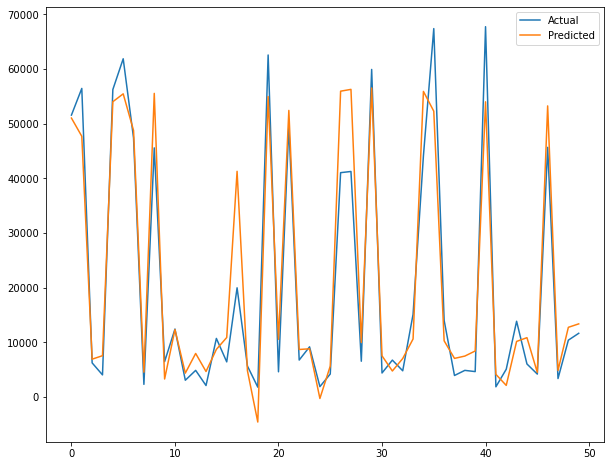

In [113]:
plt.figure(figsize=(10,8))
plt.plot(l_reg[:50])
plt.legend(["Actual" , "Predicted"])

In [114]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import statsmodels.api as sm

In [115]:
y_pred_reg=reg.predict(x_test)
lin_score_reg = r2_score(y_test , y_pred_reg)
lin_score_reg

0.9062603983907276

In [116]:
p = len(x_train[0])
n = len(y_train)
adj_R2_reg = 1-(1-lin_score_reg)*(n-1)/(n-p-1)
adj_R2_reg

0.9062564624806816

In [117]:
lin_score_reg>adj_R2_reg

True

In [118]:
lin_mape_reg= mean_absolute_percentage_error(y_test,y_pred_reg)
lin_mape_reg

0.4392231467118732

In [119]:
mae_reg=mean_absolute_error(y_test,y_pred_reg)
mae_reg

4624.136041008163

In [120]:
mse_reg=mean_squared_error(y_test,y_pred_reg)
mse_reg

48378354.62479359

In [121]:
rmse_reg=mse_reg**0.5
rmse_reg

6955.455026437421

<br>

### *Ridge Regression Model* 

In [122]:
rid = linear_model.RidgeCV(alphas = (0.1, 0.3, 0.5, 0.7, 0.9, 1, 10, 20, 50))

In [123]:
rid.fit(x_train , y_train)

RidgeCV(alphas=array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1. , 10. , 20. , 50. ]))

In [124]:
train_score_rid=rid.score(x_train,y_train)

In [125]:
test_score_rid=rid.score(x_test,y_test)

In [126]:
y_pred =rid.predict(x_test)
r_reg = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
r_reg.head(10)

,Y_test,Y_pred
0,51595,51052.665460
1,56476,47720.358561
2,6262,6944.926302
3,4071,7582.004386
4,56273,54044.295144
5,61899,55483.044656
6,47408,48778.518658
7,2339,4569.313154
8,45600,55568.881401
9,6502,3318.940131


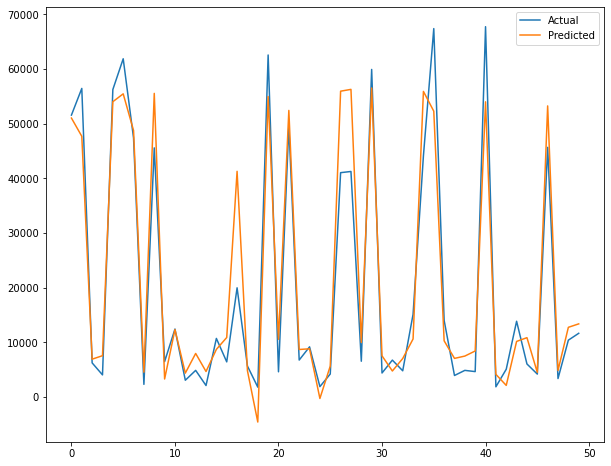

In [127]:
plt.figure(figsize=(10,8))
plt.plot(r_reg[:50])
plt.legend(["Actual" , "Predicted"])

In [128]:
rid.alpha_
#best alpha

0.3

In [129]:
rid = linear_model.Ridge(alpha=0.3)
rid.fit(x_train, y_train)

Ridge(alpha=0.3)

In [130]:
train_score_rid=rid.score(x_train,y_train)

In [131]:
intercept_rid=rid.intercept_

In [132]:
y_pred_rid=rid.predict(x_test)

In [133]:
lin_score_rid = r2_score(y_test , y_pred_rid)
lin_score_rid

0.9062603664895218

In [134]:
adj_R2_rid = 1-(1-lin_score_rid)*(n-1)/(n-p-1)
adj_R2_rid

0.9062564305781364

In [135]:
lin_score_rid>adj_R2_rid

True

In [136]:
lin_mape_rid= mean_absolute_percentage_error(y_test,y_pred_rid)
lin_mape_rid

0.43922557276613805

In [137]:
mae_rid=mean_absolute_error(y_test,y_pred_rid)
mae_rid

4624.14815309034

In [138]:
mse_rid=mean_squared_error(y_test,y_pred_rid)
mse_rid

48378371.08878342

In [139]:
rmse_rid=mse_rid**0.5
rmse_rid

6955.4562099680725

### *Lasso Regression Model* 

In [140]:
las = linear_model.LassoCV(alphas = (0.1, 0.3, 0.5, 0.7, 0.9, 1, 10, 20, 50))
las.fit(x_train, y_train)

LassoCV(alphas=(0.1, 0.3, 0.5, 0.7, 0.9, 1, 10, 20, 50))

In [141]:
train_score_las=las.score(x_train,y_train)

In [142]:
test_score_las=las.score(x_test,y_test)

In [143]:
intercept_las=las.intercept_

In [144]:
las.alpha_

0.1

In [145]:
y_pred =las.predict(x_test)
la_reg = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
la_reg.head(10)

,Y_test,Y_pred
0,51595,51052.677186
1,56476,47721.053996
2,6262,6945.143381
3,4071,7582.288550
4,56273,54043.608663
5,61899,55482.559486
6,47408,48778.792718
7,2339,4569.537523
8,45600,55568.947739
9,6502,3319.635163


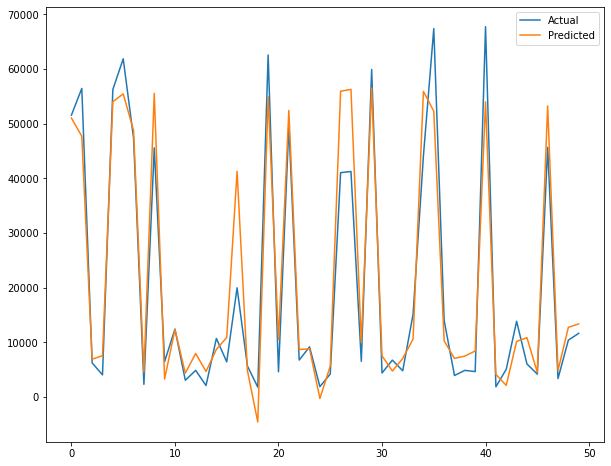

In [146]:
plt.figure(figsize=(10,8))
plt.plot(la_reg[:50])
plt.legend(["Actual" , "Predicted"])

In [147]:
y_pred_las=las.predict(x_test)

In [148]:
lin_score_las = r2_score(y_test , y_pred_las)
lin_score_las

0.9062603270136529

In [149]:
adj_R2_las = 1-(1-lin_score_las)*(n-1)/(n-p-1)
adj_R2_las

0.90625639110061

In [150]:
lin_score_las>adj_R2_las

True

In [151]:
lin_mape_las= mean_absolute_percentage_error(y_test,y_pred_las)
lin_mape_las

0.43920686818926025

In [152]:
mae_las=mean_absolute_error(y_test,y_pred_las)
mae_las

4624.079455394244

In [153]:
mse_las=mean_squared_error(y_test,y_pred_las)
mse_las

48378391.462004036

In [154]:
rmse_las=mse_las**0.5
rmse_las

6955.4576745174745

<br>

### *Decision Tree Model* 

In [155]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_features':[5, 10],
              'max_depth':[3, 5, 7, 9]}

dt=DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dt, param_grid)
dt_grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9], 'max_features': [5, 10]})

In [156]:
dt_grid.best_params_

{'max_depth': 9, 'max_features': 10}

In [157]:
train_score_dt=dt_grid.score(x_train,y_train)

In [158]:
test_score_dt=dt_grid.score(x_test ,y_test)

In [159]:
y_pred =dt_grid.predict(x_test)
dt_reg = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
dt_reg.head(10)

,Y_test,Y_pred
0,51595,51625.584480
1,56476,56590.580524
2,6262,6941.138229
3,4071,4719.908916
4,56273,62180.681842
5,61899,57689.653846
6,47408,54399.250000
7,2339,4841.053571
8,45600,52397.631839
9,6502,5629.764853


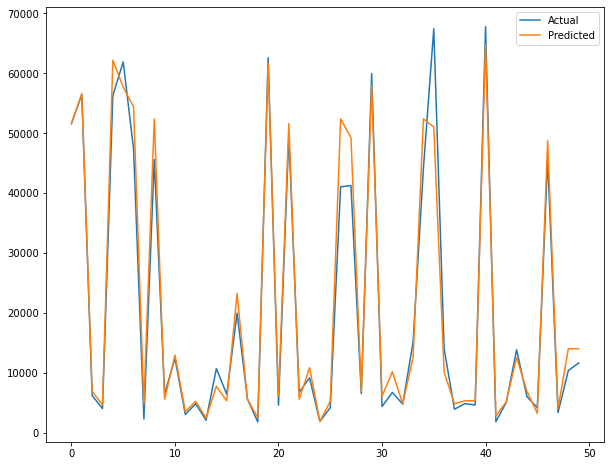

In [160]:
plt.figure(figsize=(10,8))
plt.plot(dt_reg[:50])
plt.legend(["Actual" , "Predicted"])

In [161]:
y_pred_dt=dt_grid.predict(x_test)

In [162]:
lin_score_dt = r2_score(y_test , y_pred_dt)
lin_score_dt
#0.9538148039180072

0.9634892693939713

In [163]:
adj_R2_dt = 1-(1-lin_score_dt)*(n-1)/(n-p-1)
adj_R2_dt
#0.9538128647079603

0.9634877363924552

In [164]:
lin_score_dt>adj_R2_dt

True

In [165]:
lin_mape_dt= mean_absolute_percentage_error(y_test,y_pred_dt)
lin_mape_dt

0.1710205288895847

In [166]:
mae_dt=mean_absolute_error(y_test,y_pred_dt)
mae_dt

2438.8561343664287

In [167]:
mse_dt=mean_squared_error(y_test,y_pred_dt)
mse_dt

18842933.42989885

In [168]:
rmse_dt=mse_dt**0.5
rmse_dt

4340.844782977025

<br>

### *Random Forest Model*

In [169]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators':[10, 20, 30],
              'max_features':[5, 10],
              'max_depth':[3, 5, 7, 9]}

rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, param_grid)
rf_grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9], 'max_features': [5, 10],
                         'n_estimators': [10, 20, 30]})

In [170]:
rf_grid.best_params_

{'max_depth': 9, 'max_features': 10, 'n_estimators': 30}

In [171]:
train_score_rf=rf_grid.score(x_train,y_train)

In [172]:
test_score_rf=rf_grid.score(x_test,y_test)

In [173]:
y_pred =rf_grid.predict(x_test)
rf_reg = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
rf_reg.head(10)

,Y_test,Y_pred
0,51595,51651.941659
1,56476,56312.822110
2,6262,6923.190286
3,4071,4704.416923
4,56273,62366.339421
5,61899,57826.477752
6,47408,52497.066996
7,2339,3518.010954
8,45600,53635.697783
9,6502,5628.314123


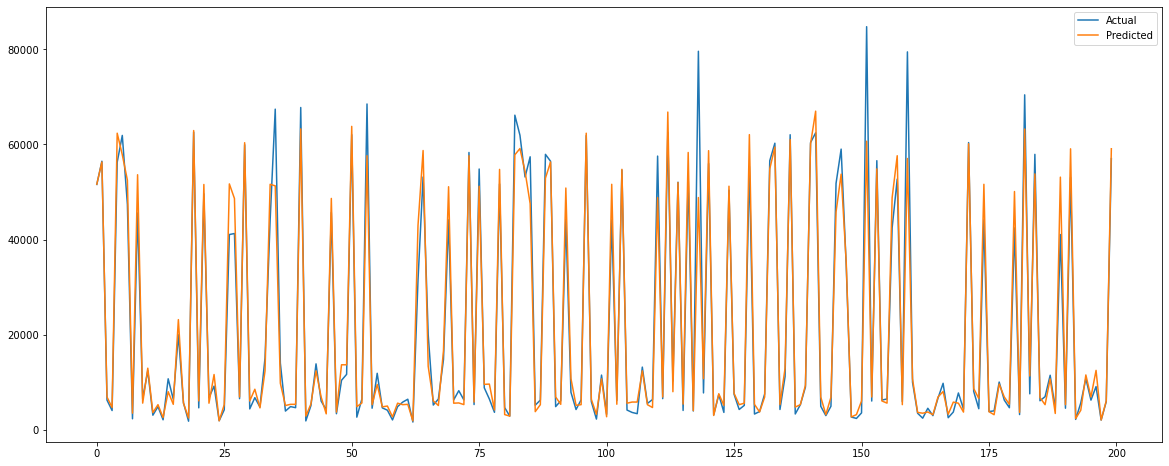

In [174]:
plt.figure(figsize=(20,8))
plt.plot(rf_reg[:200])
plt.legend(["Actual" , "Predicted"])

In [175]:
y_pred_rf=rf_grid.predict(x_test)

In [176]:
lin_score_rf = r2_score(y_test , y_pred_rf)
lin_score_rf
#0.955064838399264

0.9666093899265344

In [177]:
adj_R2_rf = 1-(1-lin_score_rf)*(n-1)/(n-p-1)
adj_R2_rf
#0.955062951675287

0.9666079879316959

In [178]:
lin_score_rf>adj_R2_rf

True

In [179]:
lin_mape_rf= mean_absolute_percentage_error(y_test,y_pred_rf)
lin_mape_rf

0.16795710176604597

In [180]:
mae_rf=mean_absolute_error(y_test,y_pred_rf)
mae_rf

2341.7481793420875

In [181]:
mse_rf=mean_squared_error(y_test,y_pred_rf)
mse_rf

17232660.98362137

In [182]:
rmse_rf=mse_rf**0.5
rmse_rf

4151.224034380868

<br>

In [183]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [184]:
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [185]:
model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
          batch_size=128,epochs=130)

Epoch 1/130
1861/1861 [==============================] - 3s 1ms/step - loss: 181143840.0000 - val_loss: 34716776.0000
Epoch 2/130
1861/1861 [==============================] - 2s 1ms/step - loss: 34376276.0000 - val_loss: 33788744.0000
Epoch 3/130
1861/1861 [==============================] - 2s 1ms/step - loss: 33667736.0000 - val_loss: 33225476.0000
Epoch 4/130
1861/1861 [==============================] - 2s 1ms/step - loss: 32875560.0000 - val_loss: 32184374.0000
Epoch 5/130
1861/1861 [==============================] - 2s 1ms/step - loss: 31655782.0000 - val_loss: 31069308.0000
Epoch 6/130
1861/1861 [==============================] - 2s 1ms/step - loss: 30769190.0000 - val_loss: 30727652.0000
Epoch 7/130
1861/1861 [==============================] - 2s 1ms/step - loss: 30107250.0000 - val_loss: 29791550.0000
Epoch 8/130
1861/1861 [==============================] - 2s 1ms/step - loss: 29419566.0000 - val_loss: 28979618.0000
Epoch 9/130
1861/1861 [==============================] - 2s 1ms

In [186]:
model_history= pd.DataFrame(model.history.history)

<AxesSubplot:>

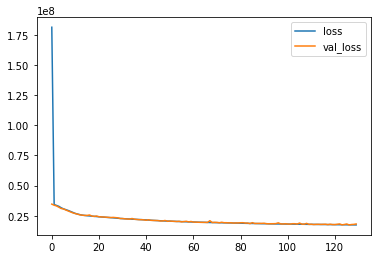

In [187]:
model_history.plot()

In [188]:
y_pred_ann = model.predict(x_test)

1861/1861 [==============================] - 1s 654us/step


In [189]:
ann_reg = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_ann.ravel()})
ann_reg.head(10)

,Y_test,Y_pred
0,51595,46911.562500
1,56476,53004.089844
2,6262,6198.301758
3,4071,3807.105469
4,56273,63279.347656
5,61899,52035.613281
6,47408,42739.339844
7,2339,3049.305420
8,45600,52060.734375
9,6502,6513.353516


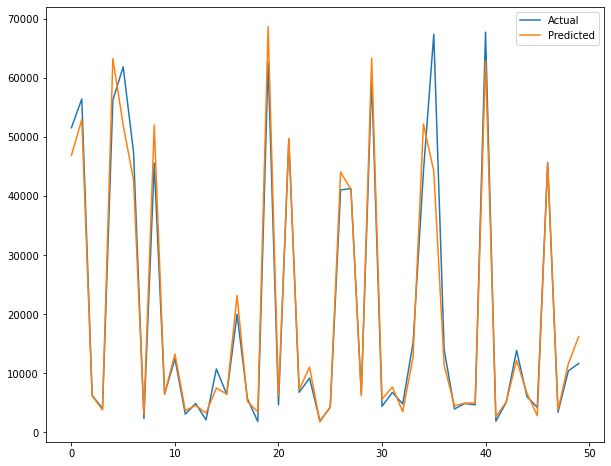

In [190]:
plt.figure(figsize=(10,8))
plt.plot(ann_reg[:50])
plt.legend(["Actual" , "Predicted"])

In [191]:
lin_score_ann = r2_score(y_test, y_pred_ann)
lin_score_ann

0.9645809851246534

In [192]:
adj_R2_ann = 1-(1-lin_score_ann)*(n-1)/(n-p-1)
adj_R2_ann

0.9645794979617673

In [193]:
lin_score_ann>adj_R2_ann

True

In [194]:
lin_mape_ann= mean_absolute_percentage_error(y_test,y_pred_ann)
lin_mape_ann

0.1756072417878243

In [195]:
mae_ann=mean_absolute_error(y_test,y_pred_ann)
mae_ann

2454.600499364424

In [196]:
mse_ann=mean_squared_error(y_test,y_pred_ann)
mse_ann

18279506.555219498

In [197]:
rmse_ann=mse_ann**0.5
rmse_ann

4275.453958963832

In [198]:
results={'Models':['Linear Regression','Ridge','Lasso','Decision Tree','Random Forest','ANN model'],
        "Train Score":[train_score_reg,train_score_rid,train_score_las,train_score_dt,train_score_rf, np.nan],
        "Test Score":[test_score_reg,test_score_rid,test_score_las,test_score_dt,test_score_rf, np.nan],
        'R2 Score':[lin_score_reg,lin_score_rid,lin_score_las,lin_score_dt,lin_score_rf, lin_score_ann],
        'Adj R2':[adj_R2_reg,adj_R2_rid,adj_R2_las,adj_R2_dt,adj_R2_rf,adj_R2_ann],
        'MAPE':[lin_mape_reg,lin_mape_rid,lin_mape_las,lin_mape_dt,lin_mape_rf,lin_mape_ann],
        'MAE':[mae_reg,mae_rid,mae_las,mae_dt,mae_rf,mae_ann],
        'MSE':[mse_reg,mse_rid,mse_las,mse_dt,mse_rf,mse_ann],
        'RMSE':[rmse_reg,rmse_rid,rmse_las,rmse_dt,rmse_rf,rmse_ann]}

In [199]:
df_results=pd.DataFrame(results)

In [200]:
df_results.set_index('Models')

,Train Score,Test Score,R2 Score,Adj R2,MAPE,MAE,MSE,RMSE
Models,,,,,,,,
Linear Regression,0.905886,0.906260,0.906260,0.906256,0.439223,4624.136041,4.837835e+07,6955.455026
Ridge,0.905886,0.906260,0.906260,0.906256,0.439226,4624.148153,4.837837e+07,6955.456210
Lasso,0.905886,0.906260,0.906260,0.906256,0.439207,4624.079455,4.837839e+07,6955.457675
Decision Tree,0.964241,0.963489,0.963489,0.963488,0.171021,2438.856134,1.884293e+07,4340.844783
Random Forest,0.967340,0.966609,0.966609,0.966608,0.167957,2341.748179,1.723266e+07,4151.224034
ANN model,NaN,NaN,0.964581,0.964579,0.175607,2454.600499,1.827951e+07,4275.453959


In [201]:
MSE_best_score = df_results["MSE"].iloc[df_results["MSE"].argmin()]

In [202]:
MSE_best_score

17232660.98362137

In [203]:
model_index = df_results['MSE'].idxmin()

In [204]:
model_index

4

In [205]:
df_results.reset_index()

,index,Models,Train Score,Test Score,R2 Score,Adj R2,MAPE,MAE,MSE,RMSE
0,0,Linear Regression,0.905886,0.906260,0.906260,0.906256,0.439223,4624.136041,4.837835e+07,6955.455026
1,1,Ridge,0.905886,0.906260,0.906260,0.906256,0.439226,4624.148153,4.837837e+07,6955.456210
2,2,Lasso,0.905886,0.906260,0.906260,0.906256,0.439207,4624.079455,4.837839e+07,6955.457675
3,3,Decision Tree,0.964241,0.963489,0.963489,0.963488,0.171021,2438.856134,1.884293e+07,4340.844783
4,4,Random Forest,0.967340,0.966609,0.966609,0.966608,0.167957,2341.748179,1.723266e+07,4151.224034
5,5,ANN model,NaN,NaN,0.964581,0.964579,0.175607,2454.600499,1.827951e+07,4275.453959


In [206]:
df_results

,Models,Train Score,Test Score,R2 Score,Adj R2,MAPE,MAE,MSE,RMSE
0,Linear Regression,0.905886,0.906260,0.906260,0.906256,0.439223,4624.136041,4.837835e+07,6955.455026
1,Ridge,0.905886,0.906260,0.906260,0.906256,0.439226,4624.148153,4.837837e+07,6955.456210
2,Lasso,0.905886,0.906260,0.906260,0.906256,0.439207,4624.079455,4.837839e+07,6955.457675
3,Decision Tree,0.964241,0.963489,0.963489,0.963488,0.171021,2438.856134,1.884293e+07,4340.844783
4,Random Forest,0.967340,0.966609,0.966609,0.966608,0.167957,2341.748179,1.723266e+07,4151.224034
5,ANN model,NaN,NaN,0.964581,0.964579,0.175607,2454.600499,1.827951e+07,4275.453959


In [207]:
best_model = df_results["Models"].iloc[model_index]

In [208]:
best_model

'Random Forest'

In [209]:
RMSE_best_score = df_results['RMSE'].iloc[model_index]

In [210]:
MSE_best_score

17232660.98362137

In [211]:
print("The recommended model is ",best_model," which has a Mean Square Error of ",MSE_best_score, " and a Root Mean Square Error of ", RMSE_best_score)

The recommended model is  Random Forest  which has a Mean Square Error of  17232660.98362137  and a Root Mean Square Error of  4151.224034380868


In [212]:
import statsmodels.api as sm

In [213]:
x2=sm.add_constant(x)
est=sm.OLS(y,x2)

In [214]:
est2=est.fit()

In [215]:
len(data)

297720

In [216]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 2.868e+05
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:05:01   Log-Likelihood:            -3.0565e+06
No. Observations:              297720   AIC:                         6.113e+06
Df Residuals:                  297709   BIC:                         6.113e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.051e+04     70.841    713.075      0.0

In [217]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [218]:
to_predict = data.drop("price",axis = 1).iloc[100]

In [219]:
to_predict

airline                5.00
flight              1441.00
source_city            2.00
departure_time         1.00
stops                  0.00
arrival_time           5.00
destination_city       5.00
class                  1.00
duration              12.83
days_left              1.00
Name: 100, dtype: float64

In [220]:
x_train[1]

array([-0.5       , -0.40740741, -0.66666667, -0.33333333,  0.        ,
        0.33333333,  0.66666667,  0.        ,  0.52216216,  0.86956522])

In [221]:
to_predict = to_predict.values.reshape(1,-1)

In [222]:
to_predict = ro_scaler.transform(to_predict)

In [223]:
to_predict

array([[ 0.5       ,  0.42307692,  0.        , -0.33333333,  0.        ,
         0.33333333,  0.66666667,  0.        ,  0.17945946, -1.08695652]])

In [224]:
rf_grid.predict(to_predict)

array([18111.95542791])

In [225]:
data.iloc[100]['price']

18450.0